In [2]:
import tensorflow as tf

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [7]:
fashion_data = tf.keras.datasets.fashion_mnist

In [12]:
(X_train,y_train),(X_test,y_test) = fashion_data.load_data()

In [13]:
X_train,X_test = X_train/255.0, X_test/255.0

In [15]:
X_train = np.expand_dims(X_train,-1)

In [16]:
X_train.shape

(60000, 28, 28, 1)

In [17]:
X_test = np.expand_dims(X_test,-1)

In [21]:
K = len(set(y_train))

In [22]:
i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model1 = Model(i, x)

In [24]:
model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
r = model1.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=20)

Epoch 1/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.5174 - accuracy: 0.8088 - val_loss: 0.3971 - val_accuracy: 0.8502
Epoch 2/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3665 - accuracy: 0.8625 - val_loss: 0.3566 - val_accuracy: 0.8668
Epoch 3/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3204 - accuracy: 0.8776 - val_loss: 0.3352 - val_accuracy: 0.8766
Epoch 4/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2859 - accuracy: 0.8919 - val_loss: 0.3059 - val_accuracy: 0.8877
Epoch 5/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2607 - accuracy: 0.9017 - val_loss: 0.3097 - val_accuracy: 0.8870
Epoch 6/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2383 - accuracy: 0.9108 - val_loss: 0.3123 - val_accuracy: 0.8892
Epoch 7/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2199 - accuracy: 0.9162 - val_loss: 0.2980 -

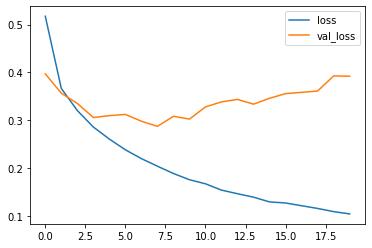

In [28]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

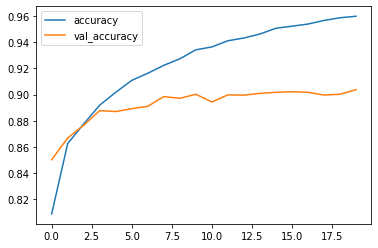

In [29]:
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.legend()

In [30]:
from sklearn.metrics import confusion_matrix

In [37]:
cf = confusion_matrix(y_test,model1.predict(X_test))

ValueError: ignored

In [35]:
y_pred = model1.predict(X_test).argmax(axis=1)

In [33]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [36]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [38]:
cf = confusion_matrix(y_test,y_pred)

In [39]:
cf

array([[881,   0,  24,  17,   3,   1,  69,   0,   5,   0],
       [  6, 974,   0,  13,   3,   0,   2,   0,   2,   0],
       [ 16,   1, 898,   9,  31,   0,  44,   0,   1,   0],
       [ 16,   5,  19, 914,  21,   0,  24,   0,   1,   0],
       [  0,   0,  95,  35, 778,   0,  90,   0,   2,   0],
       [  0,   0,   0,   0,   0, 976,   0,  16,   0,   8],
       [104,   0,  81,  23,  61,   0, 718,   0,  13,   0],
       [  0,   0,   0,   0,   0,   7,   0, 972,   0,  21],
       [  2,   1,   7,   1,   2,   3,   7,   3, 974,   0],
       [  0,   0,   0,   0,   0,   4,   1,  43,   0, 952]])

In [40]:
import seaborn as sns

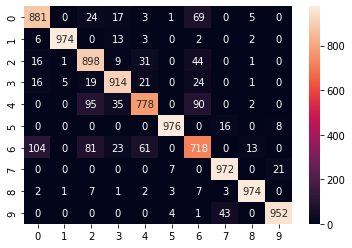

In [42]:
sns.heatmap(cf,annot=True,fmt="g")

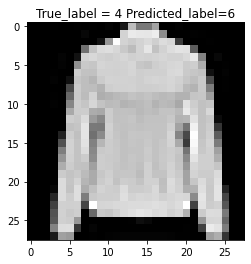

In [65]:
miss_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(miss_idx)
plt.imshow(X_test[i].reshape(28,28),cmap='gray',)
plt.title('True_label = %s Predicted_label=%s' %(y_test[i],y_pred[i]));

In [63]:
T-shirt,Trousers,Pullover,Dress,Coat,Sandal,Shirt,Sneakers,Bag,Ankel boot

SyntaxError: ignored

In [68]:
len(np.where(y_pred == y_test)[0])

9037